
### Visualizing the Data


In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import numpy as np
import PIL
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
img = cv2.imread('train/id10002/0.jpg')

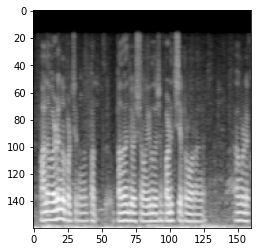

In [3]:
plt.imshow(img)

## Preparing the Data for the model

In [ ]:
# I am loading data from folders, so create the generator
image_gen = ImageDataGenerator(rotation_range=0, 
                               height_shift_range=0.1, 
                               rescale=1/255, # Rescale the image by normalzing it.
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
# width,height,channels
image_shape = (160,160,3)

In [ ]:
plt.imshow(image_gen.random_transform(img))

### Loading Data

In [ ]:
batch_size = 32

train_image_gen = image_gen.flow_from_directory('train',
                                               target_size=(160,160),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               color_mode='rgb')

val_image_gen = image_gen.flow_from_directory('validation',
                                               target_size=(160,160),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               color_mode='rgb')


In [ ]:
class_number = len(train_image_gen.class_indices)
print(class_number)

# RESNET50 (pretrained)

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=class_number,
                   weights='imagenet')


# original RESNET50 will be not trainable for us
for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)

In [ ]:
# We will add our layers where we provide training on our data
resnet_model.add(Flatten())
resnet_model.add(Dense(2048, activation='relu'))
resnet_model.add(Dense(class_number, activation='softmax'))

In [ ]:
resnet_model.summary()

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_image_gen, epochs=10, validation_data=val_image_gen)